In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import cv2
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# ! unzip sim.zip

In [4]:
import os
train_dir = 'simpsons_dataset/'
 
for dirpath, dirnames, filenames in os.walk(train_dir):
    print(dirpath, dirnames)

simpsons_dataset/ ['homer_simpson', 'professor_john_frink', 'lenny_leonard', 'krusty_the_clown', 'rainier_wolfcastle', 'bart_simpson', 'moe_szyslak', 'groundskeeper_willie', 'marge_simpson', 'fat_tony', 'troy_mcclure', 'otto_mann', 'martin_prince', 'waylon_smithers', 'lisa_simpson', 'edna_krabappel', 'gil', 'maggie_simpson', 'cletus_spuckler', 'kent_brockman', 'patty_bouvier', 'chief_wiggum', 'sideshow_bob', 'carl_carlson', 'disco_stu', 'ned_flanders', 'apu_nahasapeemapetilon', 'selma_bouvier', 'principal_skinner', 'nelson_muntz', 'lionel_hutz', 'sideshow_mel', 'miss_hoover', 'charles_montgomery_burns', 'barney_gumble', 'comic_book_guy', 'milhouse_van_houten', 'snake_jailbird', 'ralph_wiggum', 'mayor_quimby', 'agnes_skinner', 'abraham_grampa_simpson']
simpsons_dataset/homer_simpson []
simpsons_dataset/professor_john_frink []
simpsons_dataset/lenny_leonard []
simpsons_dataset/krusty_the_clown []
simpsons_dataset/rainier_wolfcastle []
simpsons_dataset/bart_simpson []
simpsons_dataset/moe

In [5]:
import os
test_dir = "kaggle_simpson_testset/"
for root, dirs, files in os.walk(test_dir):
    print(root, dirs, len(files))

kaggle_simpson_testset/ ['kaggle_simpson_testset'] 0
kaggle_simpson_testset/kaggle_simpson_testset [] 990


In [6]:
# import os
# import shutil

# dir_path = "simpsons_dataset/simpsons_dataset"

# if os.path.exists(dir_path):
#     shutil.rmtree(dir_path)

In [31]:
import os

image_label = os.listdir(train_dir)
print(len(image_label)),image_label

42


(None,
 ['homer_simpson',
  'professor_john_frink',
  'lenny_leonard',
  'krusty_the_clown',
  'rainier_wolfcastle',
  'bart_simpson',
  'moe_szyslak',
  'groundskeeper_willie',
  'marge_simpson',
  'fat_tony',
  'troy_mcclure',
  'otto_mann',
  'martin_prince',
  'waylon_smithers',
  'lisa_simpson',
  'edna_krabappel',
  'gil',
  'maggie_simpson',
  'cletus_spuckler',
  'kent_brockman',
  'patty_bouvier',
  'chief_wiggum',
  'sideshow_bob',
  'carl_carlson',
  'disco_stu',
  'ned_flanders',
  'apu_nahasapeemapetilon',
  'selma_bouvier',
  'principal_skinner',
  'nelson_muntz',
  'lionel_hutz',
  'sideshow_mel',
  'miss_hoover',
  'charles_montgomery_burns',
  'barney_gumble',
  'comic_book_guy',
  'milhouse_van_houten',
  'snake_jailbird',
  'ralph_wiggum',
  'mayor_quimby',
  'agnes_skinner',
  'abraham_grampa_simpson'])

In [8]:
len(image_label)

42

In [32]:
import glob
train_photo = glob.glob(f"{train_dir}/*/*.jpg")
test_photo = glob.glob(f"{test_dir}/*/*.jpg")

len(train_photo), train_photo[:3],len(test_photo), test_photo[:3]

(20933,
 ['simpsons_dataset/homer_simpson/pic_0542.jpg',
  'simpsons_dataset/homer_simpson/pic_1273.jpg',
  'simpsons_dataset/homer_simpson/pic_0445.jpg'],
 990,
 ['kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_17.jpg',
  'kaggle_simpson_testset/kaggle_simpson_testset/chief_wiggum_21.jpg',
  'kaggle_simpson_testset/kaggle_simpson_testset/chief_wiggum_42.jpg'])

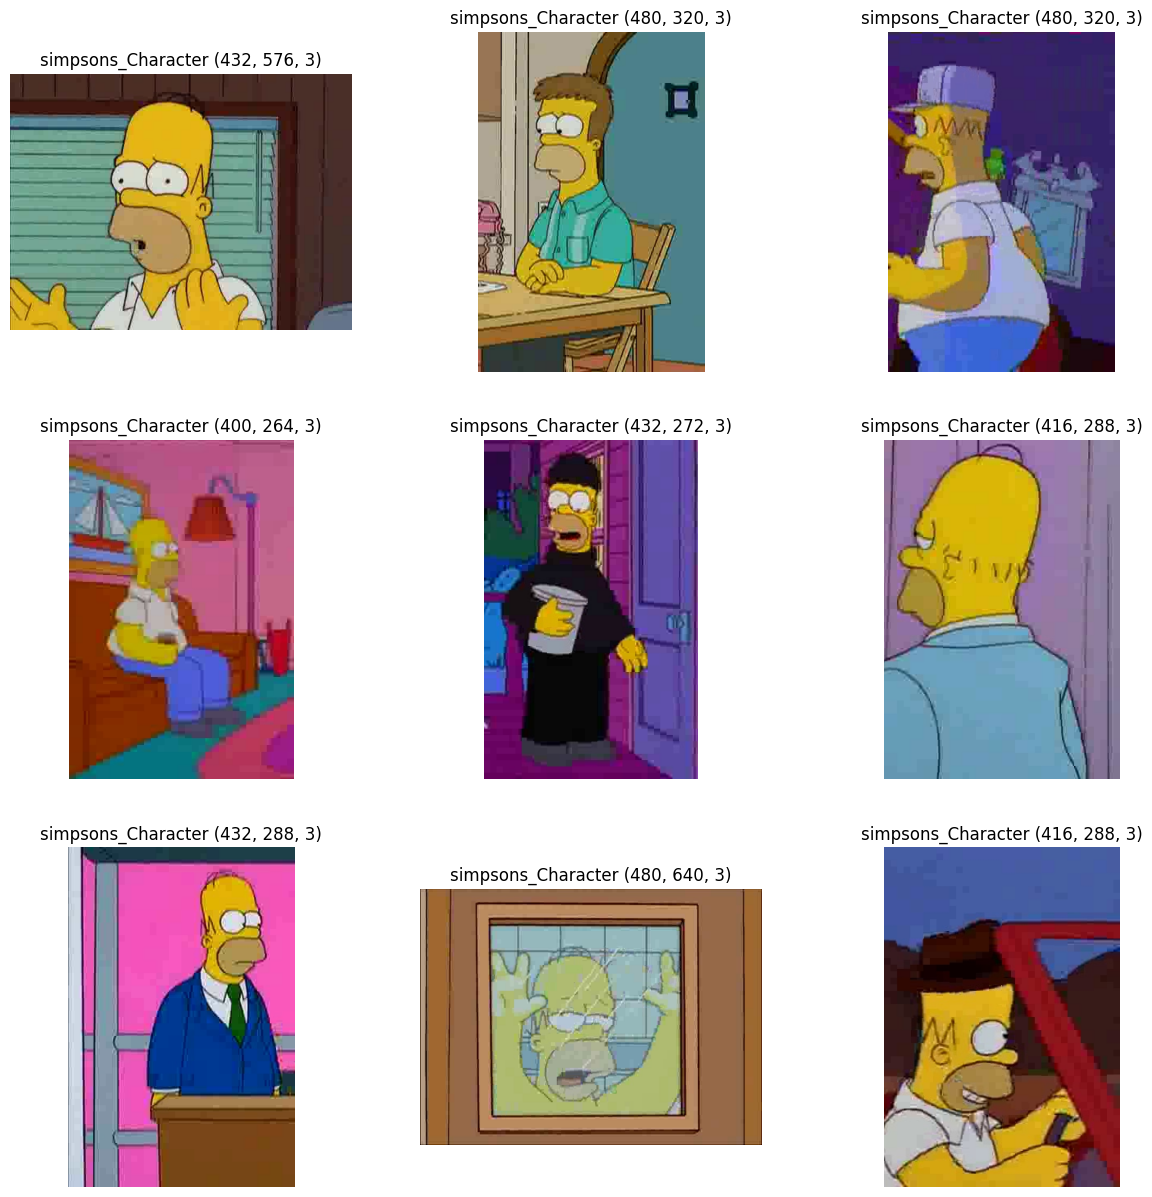

In [10]:
plt.figure(figsize=(15, 15))
labels = "simpsons_Character"
for i, images in enumerate(train_photo[:9]):
    ax = plt.subplot(3, 3, i + 1)
    img = cv2.imread(images)
    RGB_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_image)
    plt.title(f'{labels} {img.shape}')
    plt.axis("off")

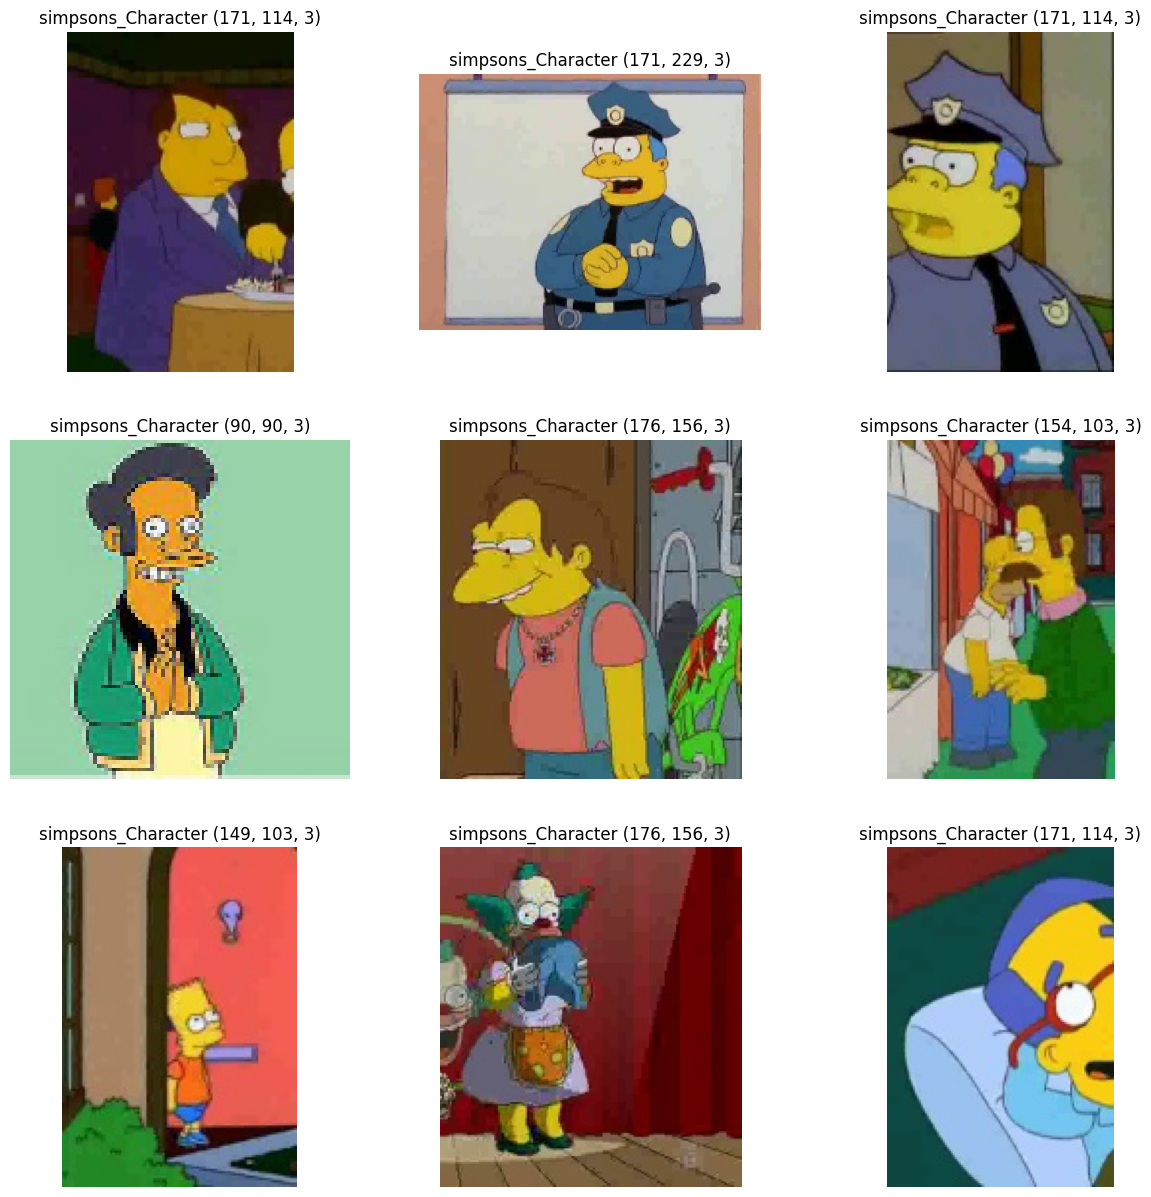

In [35]:
plt.figure(figsize=(15, 15))

for i, images in enumerate(test_photo[:9]):
    ax = plt.subplot(3, 3, i + 1)
    img = cv2.imread(images)
    RGB_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_image)
    plt.title(f'{labels} {RGB_image.shape}')
    plt.axis("off")

In [12]:
width = 64
height = 64

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [14]:
trainDatagen = datagen.flow_from_directory(directory = train_dir,
                                           target_size = (height, width),
                                           # class_mode = 'sparse',
                                           class_mode = 'categorical',
                                           # batch_size 모델 학습에 한번에 입력할 데이터셋
                                           batch_size = 100,
                                           subset='training')

Found 16764 images belonging to 42 classes.


In [15]:
valDatagen = datagen.flow_from_directory(directory = train_dir,
                                         target_size =(height, width),
                                         # class_mode = 'sparse',
                                         class_mode = 'categorical',
                                         batch_size = 100,
                                         subset='validation')

Found 4169 images belonging to 42 classes.


import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(height,width,3)), #cnn layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    tf.keras.layers.Dropout(0.23), # 무작위로 퍼셉트론 비활성화(23%)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Flatten(), # N차원 배열 -> 1차원 배열
    tf.keras.layers.Dense(1024, activation = 'relu'), #fully connected layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(image_label), activation = 'softmax') # ouput layer
])

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                     input_shape=(height, width, 3), activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 

model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(len(image_label), activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

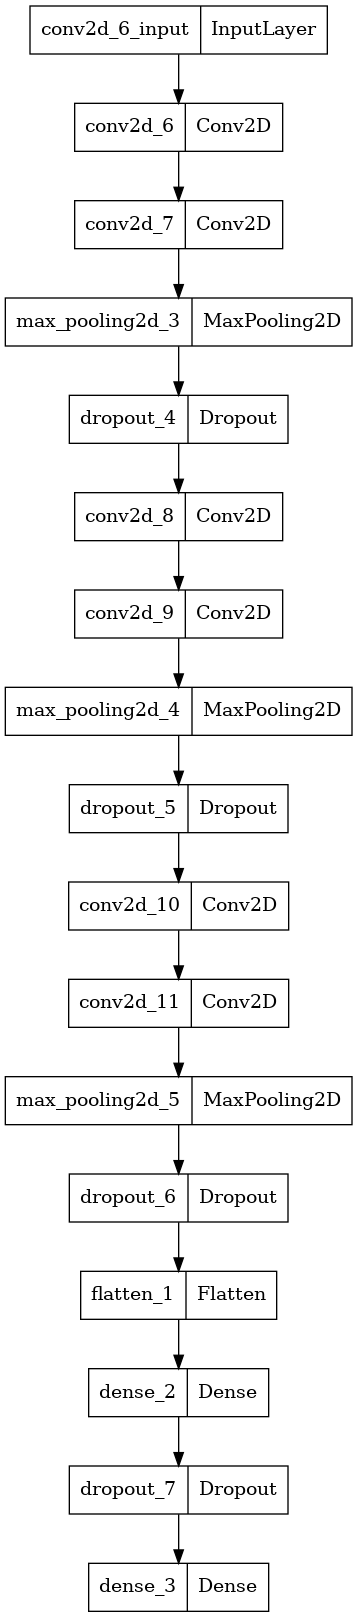

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [25]:
from keras import optimizers
from tensorflow import keras

# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer="adam",
            #   loss='binary_crossentropy', 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_accuracy",patience=5, verbose=1)

In [27]:
history = model.fit(trainDatagen,validation_data=valDatagen, epochs=100,
  callbacks=[earlystop])

Epoch 1/100
168/168 [==============================] - 251s 1s/step - loss: 2.8486 - accuracy: 0.1891 - val_loss: 2.3930 - val_accuracy: 0.3536
Epoch 2/100
168/168 [==============================] - 249s 1s/step - loss: 1.8629 - accuracy: 0.4881 - val_loss: 1.5497 - val_accuracy: 0.5747
Epoch 3/100
168/168 [==============================] - 250s 1s/step - loss: 1.2559 - accuracy: 0.6485 - val_loss: 1.2662 - val_accuracy: 0.6563
Epoch 4/100
168/168 [==============================] - 252s 1s/step - loss: 0.8848 - accuracy: 0.7483 - val_loss: 1.0783 - val_accuracy: 0.7069
Epoch 5/100
168/168 [==============================] - 250s 1s/step - loss: 0.6692 - accuracy: 0.8058 - val_loss: 1.0085 - val_accuracy: 0.7364
Epoch 6/100
168/168 [==============================] - 253s 2s/step - loss: 0.5034 - accuracy: 0.8500 - val_loss: 0.9394 - val_accuracy: 0.7659
Epoch 7/100
168/168 [==============================] - 256s 2s/step - loss: 0.3660 - accuracy: 0.8902 - val_loss: 1.0182 - val_accuracy:

In [28]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
18,0.091419,0.972620,1.228541,0.793955
19,0.082961,0.973813,1.228809,0.786280
20,0.097187,0.970472,1.309348,0.782442
21,0.088262,0.972501,1.281717,0.788678
22,0.100088,0.967728,1.224165,0.781242


<AxesSubplot:>

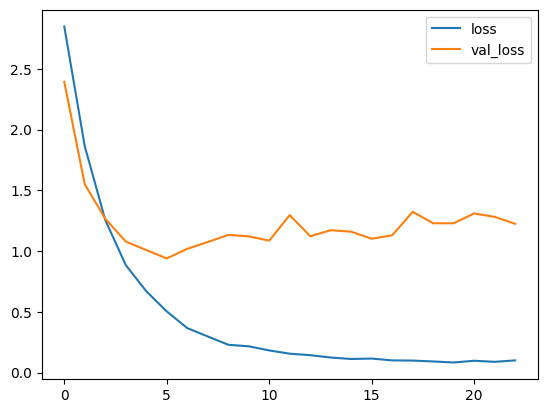

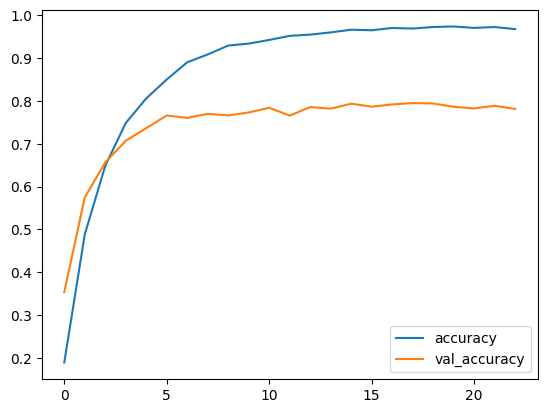

In [29]:
df_hist[["loss","val_loss"]].plot()
df_hist[["accuracy","val_accuracy"]].plot()